In [1]:
import sys
import warnings
#warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go

In [4]:
    dataset = pd.read_csv('dataexport_20200630T053449.csv', delimiter=',', index_col=['variable'], parse_dates=['variable'])

In [7]:
#dataset['Temperature']
dataset

,Temperature,Precipitation Total,Wind Speed,Wind Direction
variable,,,,
2020-06-23 00:00:00,20.568188,0.0,6.487264,109.179010
2020-06-23 01:00:00,19.228188,0.0,6.911014,117.552810
2020-06-23 02:00:00,17.888187,0.0,6.874978,125.537674
2020-06-23 03:00:00,16.768188,0.0,6.791894,131.820160
2020-06-23 04:00:00,15.908188,0.0,6.595754,133.363420
...,...,...,...,...
2020-06-30 19:00:00,17.818188,0.0,9.266738,108.434944
2020-06-30 20:00:00,17.798187,0.0,9.304952,113.629370
2020-06-30 21:00:00,17.228188,0.0,7.766828,120.963760


In [14]:
otg=dataset['Temperature'].resample('W', how='mean')

TypeError: resample() got an unexpected keyword argument 'how'

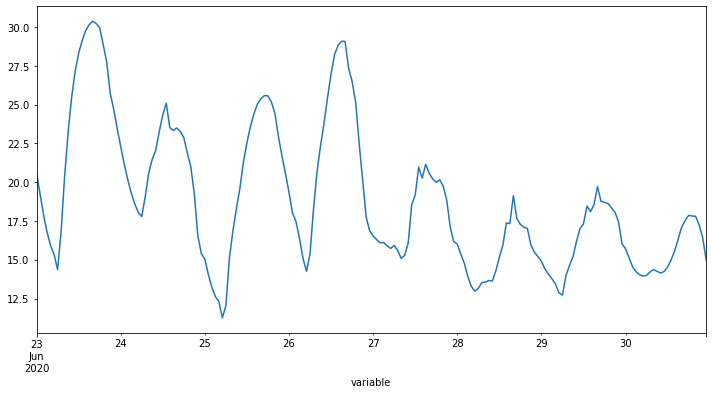

In [15]:
otg.plot(figsize=(12,6))

count    192.000000
mean      18.890011
std        4.603329
min       11.258187
25%       15.260688
50%       17.793187
75%       21.735689
max       30.368187
Name: Temperature, dtype: float64

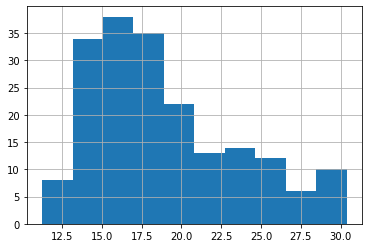

In [16]:
itog = otg.describe()
otg.hist()
itog

In [17]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(otg)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print itog

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(itog)? (<ipython-input-17-48672b34ec11>, line 5)

In [24]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [25]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(dataset.Users, alpha), label="Alpha {}".format(alpha))
    plt.plot(dataset.Users.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

AttributeError: 'DataFrame' object has no attribute 'Users'

<Figure size 1440x576 with 0 Axes>